Здесь важно сделать поправку, что если оставлять оценку после покупки необязательно, мы получим не самую показательную выборку.
Или, возможно, выборка уже искажена, например, женщины более придирчивы или чаще оставляли оценки, чем мужчины. Может в целом - оценку хотели ставить люди, которые всем довольны или наоборот - недовольны. В общем - мы не знаем как собирались данные, потому нельзя судить о достоверности и делать строгие выводы.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data1 = pd.read_csv('market_poll1.csv')
data1.mean()

sex                0.720
age               42.598
first_purchase     0.750
grade_service      7.100
grade_product      8.300
dtype: float64

In [ ]:
data1.mode()

,sex,age,first_purchase,grade_service,grade_product
0,1,29,1,10,10


Видим, что средний возраст по первой таблице составляет 43 года, перимущественно женщины.

Оценка сервиса: 7.1

Оценка продукта: 8.3

Медианный возраст составляет 29 лет.

Я считаю, что в плане возраста стоит ориентироваться именно на медианный возраст.

Сразу будем исследовать только те данные, которые связаны именно с нужной группой по возрасту.

In [ ]:
a = []
for i in range(35,60,1):
  a.append(i)
df_filter = data1 ['age']. isin (a)
data1_new = data1 [df_filter]
data1_new

In [ ]:
data1_new.mode()

,sex,age,first_purchase,grade_service,grade_product
0,1,40,1,10,10


In [ ]:
data1_new.mean()

sex                0.748718
age               45.805128
first_purchase     0.805128
grade_service      7.056410
grade_product      8.430769
dtype: float64

Видим, что в данной возрастной группе оценка продукта стала выше, однако оценка сервиса наоборот - уменьшилась. Соответственно, можно улучить сервис конкретно под запросы нужной возрастной группы.

Посчитаем теперь кому больше нравится продукт - женщинам или мужчинам.

Женщины:

In [ ]:
df_filter = data1_new ['sex']. isin ([1])
data1_new1 = data1_new [df_filter]
data1_new1.mean()

sex                1.000000
age               45.561644
first_purchase     0.794521
grade_service      7.082192
grade_product      8.465753
dtype: float64

Мужчины:

In [ ]:
df_filter = data1_new ['sex']. isin ([0])
data1_new1 = data1_new [df_filter]
data1_new1.mean()

sex                0.000000
age               46.530612
first_purchase     0.836735
grade_service      6.979592
grade_product      8.326531
dtype: float64

Видим, что мужчинам из нужной возрастной категории в среднем чуть меньше нравится продукт и сервис, чем женщинам.

Второй датасет (про доставку)

In [ ]:
data2 = pd.read_csv('market_poll2.csv')
data2.mean()

sex               0.689091
age              41.140000
grade_service     9.100000
grade_product     8.700000
dtype: float64

In [ ]:
data2.mode()

,sex,age,grade_service,grade_product
0,1,24,10,10



Оценка сервиса: 7.1

Оценка продукта: 8.3

Медианный возраст составляет 29 лет.



Выберем данные именно для нужных нам возрастов, используя фильтр, аналогичный предыдущему.

In [ ]:
df_filter = data2 ['age']. isin (a)
data2_new = data2 [df_filter]
data2_new

In [ ]:
data2_new.mean()

sex               0.683938
age              46.569948
grade_service     9.170984
grade_product     8.673575
dtype: float64

Оценка сервиса у нужной группы людей по возрасту сильно увеличилась по сравнению с общей средней, значит служба доставки нравится нужной нам категории людей. Можно делать скидки на доставку или большее ее рекламировать.

Оценка продукта так же увеличилась, но не очень сильно.

In [ ]:
data3 = pd.read_csv('market_poll3.csv')
data3.head()

,sex,age,bed_linen,bath,blanket,kit,decor,cloth
0,1,16,0,1,1,0,0,0
1,1,47,1,0,1,0,0,0
2,1,29,0,0,1,0,0,0
3,1,34,0,0,0,0,1,0
4,1,41,0,0,1,0,0,0


In [ ]:
df_filter = data3 ['age']. isin (a)
data3_new = data3 [df_filter]
data3_new

,sex,age,bed_linen,bath,blanket,kit,decor,cloth
1,1,47,1,0,1,0,0,0
4,1,41,0,0,1,0,0,0
10,0,41,0,1,1,1,1,1
16,1,35,1,0,1,1,1,0
17,1,37,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
332,1,54,0,0,1,0,1,0
334,1,53,0,0,1,1,1,0
341,1,57,1,1,1,0,1,1
344,0,37,1,0,0,0,1,1


In [ ]:
data3_new['bed_linen'].value_counts()

1    58
0    51
Name: bed_linen, dtype: int64

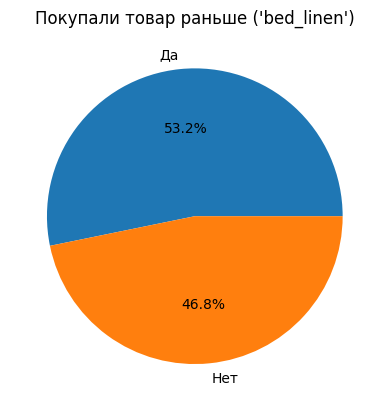

In [ ]:
vals = [58, 51]
labels = ["Да", "Нет"]

plt.pie(vals, labels=labels, autopct='%1.1f%%')
plt.title("Покупали товар раньше ('bed_linen')")
plt.show()

Диаграмма по всем позрастам:

In [ ]:
data3.sum()

sex            273
age          12826
bed_linen      193
bath           122
blanket        210
kit             77
decor          248
cloth           46
dtype: int64

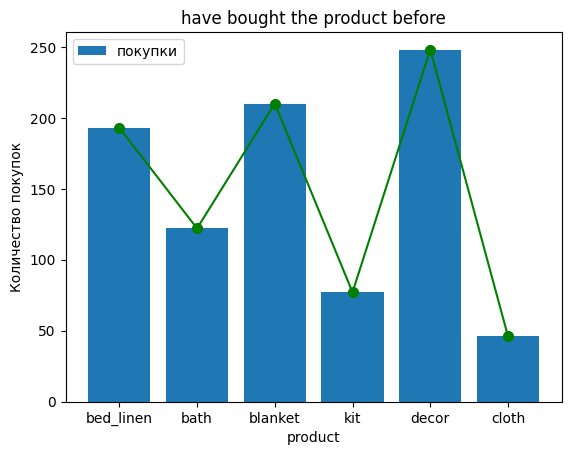

In [ ]:
x = ['bed_linen', 'bath', 'blanket', 'kit', 'decor', 'cloth']
y = [193, 122, 210, 77, 248, 46]

plt.bar(x, y, label='покупки')
plt.plot(x, y, color='green', marker='o', markersize=7)
plt.xlabel('product')
plt.ylabel('Количество покупок')
plt.title('have bought the product before')
plt.legend()
plt.show()

Диаграммы по нужным возрастам:

In [ ]:
data3_new.sum()

sex            86
age          5124
bed_linen      58
bath           36
blanket        70
kit            31
decor          82
cloth          18
dtype: int64

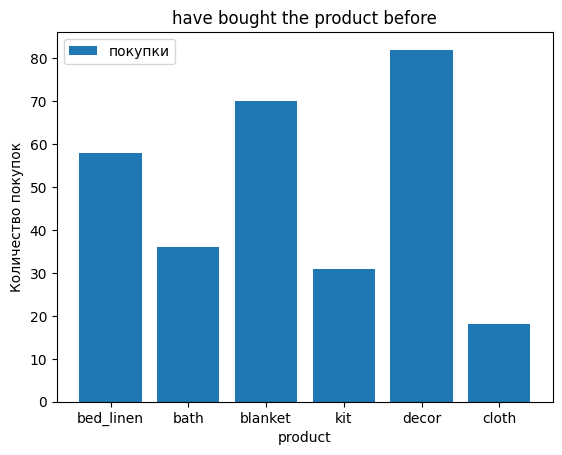

In [ ]:
x = ['bed_linen', 'bath', 'blanket', 'kit', 'decor', 'cloth']
y = [58, 36, 70, 31, 82, 18]

plt.bar(x, y, label='покупки')
plt.xlabel('product')
plt.ylabel('Количество покупок')
plt.title('have bought the product before')
plt.legend()
plt.show()

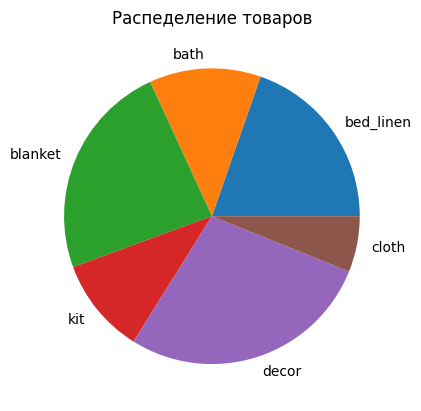

In [ ]:

plt.pie(y, labels=x)
plt.title("Распеделение товаров")
plt.show()

Больше всего пользуется спросом 'decor' и 'blanket' у исследуемой возрастной группы, занимая больше 50% от всех покупок.

In [ ]:
data4 = pd.read_csv('market_poll4.csv')
data4.max()

sex          1
age         80
bed          1
bath         1
kit          1
dish         1
cloth        1
curtains     1
dtype: int64

In [ ]:
data4['kit'].value_counts()

0    548
1    202
Name: kit, dtype: int64

Видим, что в колонках, где должны быть оценки от 1 до 5 - находятся только цифры 1 или 0. Значит, данные некорректны. Но мы можем интерпретировать это как: 1 - посоветовал бы купить другому, 0 - не посоветовал бы.

In [ ]:
data4.sum()

sex           660
age         31452
bed           488
bath          413
kit           202
dish          458
cloth         128
curtains      548
dtype: int64

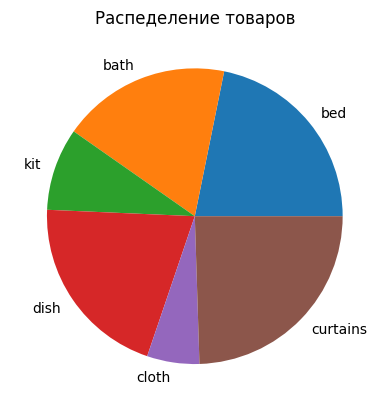

In [ ]:
x = ['bed', 'bath', 'kit', 'dish', 'cloth', 'curtains']
y = [488, 413, 202, 458, 128, 548]

plt.pie(y, labels=x)
plt.title("Распеделение товаров по их оценкам")
plt.show()